In [233]:
# 观察albumentations工具提供的图像增强效果
import matplotlib.pyplot as plt
import torch
import albumentations as A
import numpy as np
import cv2
from datasets import nii_loader
from utils import drawhistogram
data = nii_loader('C0')['image']
label = nii_loader('C0',is_label=True)['image']
image = data[:len(label)]

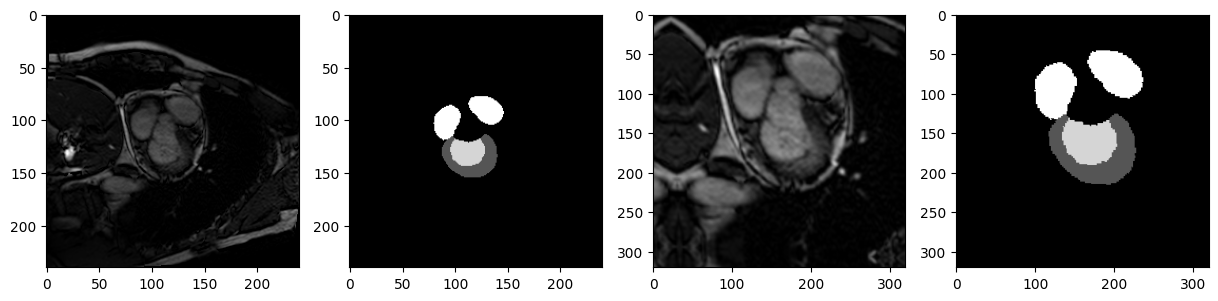

In [361]:
train_transforms = A.Compose([
            A.Resize(512,512,interpolation=cv2.INTER_LINEAR),
            A.CenterCrop(height=320,width=320),
            #A.ShiftScaleRotate(),
            A.ElasticTransform(alpha=200,sigma=100,alpha_affine=35,p=1),
            #A.RandomRotate90(),
            #A.VerticalFlip(),
            #A.Transpose(),
            #A.OpticalDistortion(p=1,distort_limit=2)
        ])
index = 100
re = train_transforms(image=image[index],mask=label[index])
ipro = re['image']
mpro = re['mask']
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image[index],cmap='gray')
plt.subplot(1,4,2)
plt.imshow(label[index],cmap='gray')
plt.subplot(1,4,3)
plt.imshow(ipro,cmap='gray')
plt.subplot(1,4,4)
plt.imshow(mpro,cmap='gray')

In [4]:
from datasets import nii_loader

lge = nii_loader('LGE')
bssfp = nii_loader('C0')
t2 = nii_loader('T2')

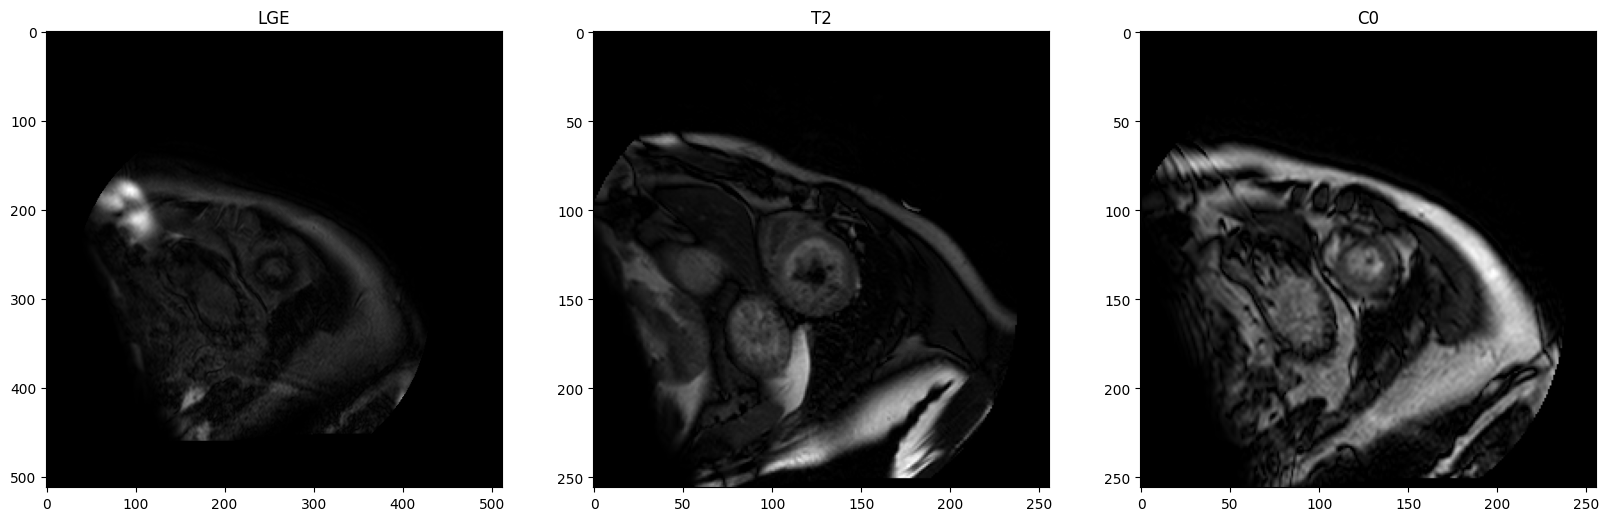

In [5]:
# 测试图像缩放
index = 1
lge1 = lge['image'][index]
bssfp1 = bssfp['image'][index]
t21 = t2['image'][index]

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(1,3,1).set_title('LGE')
plt.imshow(lge1,cmap='gray')
plt.subplot(1,3,2).set_title('T2')
plt.imshow(t21,cmap='gray')
plt.subplot(1,3,3).set_title('C0')
plt.imshow(bssfp1,cmap='gray')